<a href="https://colab.research.google.com/github/chl-eo/CCDATSCL_ASSIGNMENT/blob/main/Assignmnet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

In this activity, you will work with the New York City Airbnb Open Data—a popular, messy, and highly realistic dataset used by data analysts and data scientists around the world. The dataset includes thousands of Airbnb listings along with details about hosts, locations, prices, reviews, and more.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8Pmq3Gv7y7z_2Xun-OqMIk43kd5u0TXEatw&s"/>


To guide your work, you will follow the 6-Step Data Wrangling Process, a professional workflow used in industry:

- Discovering. Become familiar with the data by exploring its structure and observing patterns.

- Structuring. Fix issues related to format, column types, indices, and duplicated records.

- Cleaning. Handle missing values, outliers, and inconsistencies so the dataset becomes trustworthy.

- Enriching. Add new features, aggregate information, and enhance the dataset for deeper insights.

- Validating. Apply rule-based checks to ensure the data meets quality standards.

- Publishing. Export and prepare the cleaned dataset for downstream analysis or reporting.
Throughout this exercise, you will answer questions and fill in code cells based on these six steps. You will mimic what professional data scientists do when preparing data for business intelligence dashboards, machine learning models, or exploratory analysis.

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

100%|██████████| 2.44M/2.44M [00:00<00:00, 37.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/dgomonov/new-york-city-airbnb-open-data/versions/3
True


## A. Discovering


Display the first 10 rows

In [4]:
display(df.head(10))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


Display the column names:

In [5]:
display(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Display the dataframe shape:

In [6]:
display(df.shape)

(48895, 16)

Identify the numerical features:

In [7]:
display(df.select_dtypes(include=np.number).columns)

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Identify the categorical features

In [8]:
display(df.select_dtypes(include='object').columns)

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

What are the top 5 questions this dataset might help answer?

In [ ]:
1. Are Airbnb prices depends on where the place is located?
2. If the places are closer to the tourist spot, do they charge more?
3. Does the price vary depending on the popular hosts?
4. How can we get our money's worth while not compromising the best comfortability?
5. Based on this data, how can we identify if the place is expensive?

## B. Structuring

Check if the dataset has proper column types

In [9]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

None

Check if the dataset has index issues

In [11]:
print(f"Is index unique: {df.index.is_unique}")
display(df.index)

Is index unique: True


RangeIndex(start=0, stop=48895, step=1)

Check if the dataset has duplicated rows

In [12]:
print(f"Does index have duplicates: {df.index.has_duplicates}")
display(df.index)

Does index have duplicates: False


RangeIndex(start=0, stop=48895, step=1)

Convert columns to correct types (e.g., dates → datetime).

In [15]:
df['last_review'] = pd.to_datetime(df['last_review'])
display(df.last_review)

,last_review
0,2018-10-19
1,2019-05-21
2,NaT
3,2019-07-05
4,2018-11-19
...,...
48890,NaT
48891,NaT
48892,NaT
48893,NaT


Identify at least one structural issue and describe how to fix it.

In [ ]:
The 'last_review' column was identified as an 'object' data type, which is incorrect for date information and should be a datetime type. To fix this, the pd.to_datetime() function was used to convert the 'last_review' column to the datetime format. This function intelligently parses various string representations of dates into a standard datetime object.

## C. Cleaning



Check for missing values

In [16]:
display(df.isnull().sum())

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Check for outliers in `minimum_nights`

In [20]:
description = df['minimum_nights'].describe()
print(description)

Q1 = description['25%']
Q3 = description['75%']
IQR = Q3 - Q1

print(f"\nQ1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

Q1 (25th percentile): 1.0
Q3 (75th percentile): 5.0
IQR (Interquartile Range): 4.0


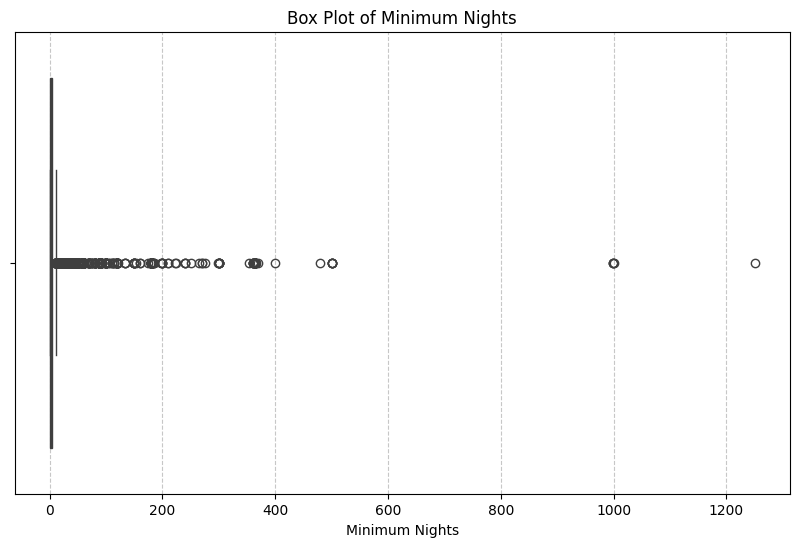

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['minimum_nights'])
plt.title('Box Plot of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Check for invalid values (e.g., price ≤ 0)

In [22]:
invalid_prices = df[df['price'] <= 0]
display(f"Number of listings with price <= 0: {len(invalid_prices)}")
display(invalid_prices.head())

'Number of listings with price <= 0: 11'

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73


In [30]:
missing_values_summary = df.isnull().sum()
missing_values_summary = missing_values_summary[missing_values_summary > 0]

invalid_price_count = len(df[df['price'] <= 0])
invalid_min_nights_count = len(df[df['minimum_nights'] < 1])

summary_report = []

if not missing_values_summary.empty:
    for col, count in missing_values_summary.items():
        summary_report.append({
            'column(s)': col,
            'type_of_invalidity': 'missing values',
            'count_affected_rows': count,
            'description': f'{count} missing values in {col}'
        })

if invalid_price_count > 0:
    summary_report.append({
        'column(s)': 'price',
        'type_of_invalidity': 'invalid numerical value (price <= 0)',
        'count_affected_rows': invalid_price_count,
        'description': f'{invalid_price_count} listings with price <= 0'
    })

if invalid_min_nights_count > 0:
    summary_report.append({
        'column(s)': 'minimum_nights',
        'type_of_invalidity': 'invalid numerical value (minimum_nights < 1)',
        'count_affected_rows': invalid_min_nights_count,
        'description': f'{invalid_min_nights_count} listings with minimum_nights < 1'
    })

# For categorical inconsistencies, we'll list the columns to be reviewed further
categorical_inconsistencies_info = [
    "Review 'neighbourhood_group' for inconsistencies: " + str(df['neighbourhood_group'].value_counts().index.tolist()),
    "Review 'neighbourhood' for inconsistencies: (too many unique values to list, requires detailed inspection)",
    "Review 'room_type' for inconsistencies: " + str(df['room_type'].value_counts().index.tolist()),
    f"'name': {df['name'].nunique()} unique values (requires detailed inspection)",
    f"'host_name': {df['host_name'].nunique()} unique values (requires detailed inspection)"
]


print("### Invalid Values Summary Report")
print("---------------------------------")
for item in summary_report:
    print(f"- Column(s): {item['column(s)']}")
    print(f"  Type of Invalidity: {item['type_of_invalidity']}")
    print(f"  Count Affected Rows: {item['count_affected_rows']}")
    print(f"  Description: {item['description']}")
    print("\n")

print("### Potential Categorical Inconsistencies for Review")
print("--------------------------------------------------")
for info in categorical_inconsistencies_info:
    print(f"- {info}")

### Invalid Values Summary Report
---------------------------------
- Column(s): name
  Type of Invalidity: missing values
  Count Affected Rows: 16
  Description: 16 missing values in name


- Column(s): host_name
  Type of Invalidity: missing values
  Count Affected Rows: 21
  Description: 21 missing values in host_name


- Column(s): last_review
  Type of Invalidity: missing values
  Count Affected Rows: 10052
  Description: 10052 missing values in last_review


- Column(s): reviews_per_month
  Type of Invalidity: missing values
  Count Affected Rows: 10052
  Description: 10052 missing values in reviews_per_month


- Column(s): price
  Type of Invalidity: invalid numerical value (price <= 0)
  Count Affected Rows: 11
  Description: 11 listings with price <= 0


### Potential Categorical Inconsistencies for Review
--------------------------------------------------
- Review 'neighbourhood_group' for inconsistencies: ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
- Revie

Apply a missing-value strategy (drop, fill, or flag)


In [31]:
df['reviews_per_month'].fillna(0, inplace=True)

display(df[['reviews_per_month', 'last_review']].head())
display(df['reviews_per_month'].isnull().sum())

/tmp/ipython-input-3165610978.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


,reviews_per_month,last_review
0,0.21,2018-10-19
1,0.38,2019-05-21
2,0.00,NaT
3,4.64,2019-07-05
4,0.10,2018-11-19


np.int64(0)

In [32]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

display(df[['reviews_per_month', 'last_review']].head())
display(df['reviews_per_month'].isnull().sum())

,reviews_per_month,last_review
0,0.21,2018-10-19
1,0.38,2019-05-21
2,0.00,NaT
3,4.64,2019-07-05
4,0.10,2018-11-19


np.int64(0)

In [33]:
df['last_review'] = df['last_review'].fillna(pd.to_datetime('1970-01-01'))

display(df[['reviews_per_month', 'last_review']].head())
display(df['last_review'].isnull().sum())

,reviews_per_month,last_review
0,0.21,2018-10-19
1,0.38,2019-05-21
2,0.00,1970-01-01
3,4.64,2019-07-05
4,0.10,2018-11-19


np.int64(0)

In [34]:
df['name'] = df['name'].fillna('Unknown')
df['host_name'] = df['host_name'].fillna('Unknown')

display(df[['name', 'host_name']].head())
display(df['name'].isnull().sum())
display(df['host_name'].isnull().sum())

,name,host_name
0,Clean & quiet apt home by the park,John
1,Skylit Midtown Castle,Jennifer
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth
3,Cozy Entire Floor of Brownstone,LisaRoxanne
4,Entire Apt: Spacious Studio/Loft by central park,Laura


np.int64(0)

np.int64(0)

In [36]:
display(df.isnull().sum())

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Apply an outlier-handling strategy

In [37]:
ninety_ninth_percentile_min_nights = df['minimum_nights'].quantile(0.99)
print(f"The 99th percentile for minimum_nights is: {ninety_ninth_percentile_min_nights}")

The 99th percentile for minimum_nights is: 45.0


In [38]:
df['minimum_nights'] = np.where(df['minimum_nights'] > ninety_ninth_percentile_min_nights,
                                ninety_ninth_percentile_min_nights,
                                df['minimum_nights'])

print("Outliers in 'minimum_nights' column have been capped at the 99th percentile.")

Outliers in 'minimum_nights' column have been capped at the 99th percentile.


In [39]:
description_after_capping = df['minimum_nights'].describe()
print(description_after_capping)


count    48895.000000
mean         6.116760
std          9.244957
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         45.000000
Name: minimum_nights, dtype: float64


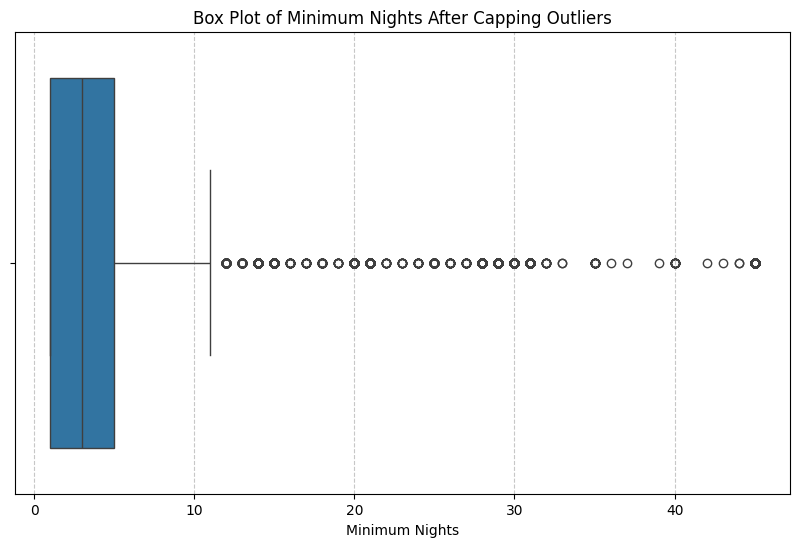

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['minimum_nights'])
plt.title('Box Plot of Minimum Nights After Capping Outliers')
plt.xlabel('Minimum Nights')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## D. Enriching

Create at least 3 new variables:
- price_per_minimum_night
- review_rate_per_month (combine ratings + frequency)
- is_expensive (boolean flag based on price threshold)


In [41]:
df['price_per_minimum_night'] = df['price'] / df['minimum_nights']
df['review_rate_per_month'] = df['reviews_per_month'] * df['number_of_reviews']

price_threshold = df['price'].quantile(0.75)
df['is_expensive'] = df['price'] > price_threshold

display(df[['price', 'minimum_nights', 'price_per_minimum_night', 'reviews_per_month', 'number_of_reviews', 'review_rate_per_month', 'is_expensive']].head())

,price,minimum_nights,price_per_minimum_night,reviews_per_month,number_of_reviews,review_rate_per_month,is_expensive
0,149,1.0,149.0,0.21,9,1.89,False
1,225,1.0,225.0,0.38,45,17.10,True
2,150,3.0,50.0,0.00,0,0.00,False
3,89,1.0,89.0,4.64,270,1252.80,False
4,80,10.0,8.0,0.10,9,0.90,False


Create 1 aggregated summary table

(e.g. average price per neighborhood number of hosts per borough)

In [42]:
average_price_per_neighbourhood_group = df.groupby('neighbourhood_group')['price'].mean().reset_index()
display(average_price_per_neighbourhood_group)

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


## E. Validating

Create at least 3 validation checks
- Price must be positive.
- Host ID should not be null.
- Minimum nights must be ≥ 1.
- Generate a validation report:
- Count of rows violating each rule.

Decide if invalid rows (if any) should be removed or corrected?

In [43]:
invalid_prices_count = len(df[df['price'] <= 0])
print(f"Number of listings with price <= 0: {invalid_prices_count}")

Number of listings with price <= 0: 11


In [44]:
host_id_null_count = df['host_id'].isnull().sum()
print(f"Number of null values in 'host_id': {host_id_null_count}")

Number of null values in 'host_id': 0


In [45]:
invalid_min_nights_count = len(df[df['minimum_nights'] < 1])
print(f"Number of listings with minimum_nights < 1: {invalid_min_nights_count}")

Number of listings with minimum_nights < 1: 0


## Validation Report

Based on the checks performed, here is a summary of the validation issues identified:


In [46]:
validation_report = []

# Rule 1: Price must be positive
validation_report.append({
    'Rule': 'Price must be positive',
    'Violations': invalid_prices_count,
    'Description': f'{invalid_prices_count} listings have a price less than or equal to 0.'
})

# Rule 2: Host ID should not be null
validation_report.append({
    'Rule': 'Host ID should not be null',
    'Violations': host_id_null_count,
    'Description': f'{host_id_null_count} listings have a null host ID.'
})

# Rule 3: Minimum nights must be >= 1
validation_report.append({
    'Rule': 'Minimum nights must be \u2265 1',
    'Violations': invalid_min_nights_count,
    'Description': f'{invalid_min_nights_count} listings have minimum nights less than 1.'
})

print("### Validation Report\n")
for item in validation_report:
    print(f"- **Rule:** {item['Rule']}")
    print(f"  **Violations:** {item['Violations']} rows")
    print(f"  **Description:** {item['Description']}\n")

print("### Recommendation for Handling Invalid Rows\n")
print("**Price \u2264 0:** These {invalid_prices_count} listings should be removed or corrected, as a price of 0 or less is not logical for an Airbnb listing. Given the small number, removal is a viable option.\n")
print("**Host ID is null:** Since no null host IDs were found, no action is needed. If any were found, these listings would likely need to be removed or investigated for data entry errors.\n")
print("**Minimum nights < 1:** Since no listings with minimum nights less than 1 were found after capping outliers, no further action is needed. If there were any, they should be corrected to at least 1, as 0 minimum nights is illogical.")

### Validation Report

- **Rule:** Price must be positive
  **Violations:** 11 rows
  **Description:** 11 listings have a price less than or equal to 0.

- **Rule:** Host ID should not be null
  **Violations:** 0 rows
  **Description:** 0 listings have a null host ID.

- **Rule:** Minimum nights must be ≥ 1
  **Violations:** 0 rows
  **Description:** 0 listings have minimum nights less than 1.

### Recommendation for Handling Invalid Rows

**Price ≤ 0:** These {invalid_prices_count} listings should be removed or corrected, as a price of 0 or less is not logical for an Airbnb listing. Given the small number, removal is a viable option.

**Host ID is null:** Since no null host IDs were found, no action is needed. If any were found, these listings would likely need to be removed or investigated for data entry errors.

**Minimum nights < 1:** Since no listings with minimum nights less than 1 were found after capping outliers, no further action is needed. If there were any, they should be c

## F. Publishing

Select final columns for publication.



In [47]:
final_columns = df.columns.tolist()

# Add the newly enriched columns to the list
final_columns.extend(['price_per_minimum_night', 'review_rate_per_month', 'is_expensive'])

# Create the df_published DataFrame with the selected columns
df_published = df[final_columns]

display(df_published.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_minimum_night,review_rate_per_month,is_expensive,price_per_minimum_night,review_rate_per_month,is_expensive
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,2018-10-19,0.21,6,365,149.0,1.89,False,149.0,1.89,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2019-05-21,0.38,2,355,225.0,17.10,True,225.0,17.10,True
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,1970-01-01,0.00,1,365,50.0,0.00,False,50.0,0.00,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,2019-07-05,4.64,1,194,89.0,1252.80,False,89.0,1252.80,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,2018-11-19,0.10,1,0,8.0,0.90,False,8.0,0.90,False


In [50]:
original_columns = df.columns.tolist()
enriched_columns = ['price_per_minimum_night', 'review_rate_per_month', 'is_expensive']

final_columns_set = set(original_columns) # Start with all current columns
final_columns_set.update(enriched_columns) # Add enriched columns, set will handle uniqueness
final_columns = list(final_columns_set)

# Define the explicit list of all desired columns (original + enriched)
desired_columns = [
    'id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
    'room_type', 'price', 'minimum_nights', 'number_of_reviews',
    'last_review', 'reviews_per_month','availability_365',
    'price_per_minimum_night', 'review_rate_per_month', 'is_expensive'
]

df_published = df[desired_columns]

display(df_published.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,price_per_minimum_night,review_rate_per_month,is_expensive
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1.0,9,2018-10-19,0.21,365,149.0,1.89,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1.0,45,2019-05-21,0.38,355,225.0,17.10,True
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3.0,0,1970-01-01,0.00,365,50.0,0.00,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1.0,270,2019-07-05,4.64,194,89.0,1252.80,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10.0,9,2018-11-19,0.10,0,8.0,0.90,False


Export cleaned dataset as "cleaned_airbnb.csv"

In [51]:
df_published.to_csv('cleaned_airbnb.csv', index=False)
print("Cleaned dataset exported to 'cleaned_airbnb.csv'")

Cleaned dataset exported to 'cleaned_airbnb.csv'


Export summary reports (e.g., validation or aggregations) as CSV.

In [52]:
average_price_per_neighbourhood_group.to_csv('average_price_per_neighbourhood_group.csv', index=False)
print("Average price per neighbourhood group exported to 'average_price_per_neighbourhood_group.csv'")

# Convert validation_report (list of dicts) to a DataFrame and then export
validation_report_df = pd.DataFrame(validation_report)
validation_report_df.to_csv('validation_report.csv', index=False)
print("Validation report exported to 'validation_report.csv'")

Average price per neighbourhood group exported to 'average_price_per_neighbourhood_group.csv'
Validation report exported to 'validation_report.csv'
